# Obtain Data and Install

In [78]:
#This will instlal the package in the actual jupyter notebook Kernel. [with_Jupyter] is obsolete if you start it out of jupyter, but for demo purpose left inside.
import sys
!{sys.executable} --version
!{sys.executable} -m pip install -e "."[with_jupyter] #. describes the path to the package, in this case its the same folder.

Python 3.6.7


### Enter your twitter Creds here:

In [8]:
#Access
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN =  ""
ACCESS_TOKEN_SECRET = ""

### This will download the twitter data of major parties three weeks before European Parliament Election.

In [103]:
import yatclient as yat # works but calls have to be p_twitter.TweetAnalyzer?
import datetime

EuropawahlDate = datetime.date(2019, 5, 23)
ThreeWeeksBeforeDate = EuropawahlDate - datetime.timedelta(weeks=3)
today = datetime.date.today()

twitter_client = yat.TwitterClient(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET, ["spdde", "fdp","die_Gruenen","afd","dieLinke","fwlandtag","diepartei"])

tweets = twitter_client.get_user_timeline_tweets(start_date = str(ThreeWeeksBeforeDate), end_date = str(EuropawahlDate))
analyzer_load = yat.TweetAnalyzer(tweets)
analyzer_load.write_to_csv("tweets{}.csv".format(today), encoding = "utf-8")
print("saved data to tweets{}.csv\n".format(today))
df = analyzer_load.get_dataframe()
df.head(2)
print("Timeframe from:\n",df.groupby(by=["author"]).date.min(),"to date\n\n",df.groupby(by=["author"]).date.max())

saved data to tweets2019-07-04.csv
Timeframe from:
 author
AfD           2019-05-02 10:32:01
DiePARTEI     2019-05-02 08:15:53
Die_Gruenen   2019-05-02 10:02:14
dieLinke      2019-05-02 08:00:00
fdp           2019-05-02 07:10:41
fwlandtag     2019-05-08 16:21:48
spdde         2019-05-16 18:33:37
Name: date, dtype: datetime64[ns] to date

 author
AfD           2019-05-22 15:09:38
DiePARTEI     2019-05-22 21:22:08
Die_Gruenen   2019-05-22 16:26:08
dieLinke      2019-05-22 16:42:26
fdp           2019-05-22 16:46:25
fwlandtag     2019-05-20 07:26:16
spdde         2019-05-22 22:22:18
Name: date, dtype: datetime64[ns]


In [29]:
#Wenn Daten bereits vorhanden:
import yatclient as yat
    
analyzer = yat.TweetAnalyzer()
analyzer.read_from_csv("tweets2019-07-04.csv")

In [30]:
df = analyzer.get_dataframe()
df.head()

,Unnamed: 0,tweets,author,date,likes,retweets,hashtags,linked_accounts,urls
0,0,"@leonhardedgar @katarinabarley @zdf Hi, Iatrop...",spdde,2019-05-21 20:41:49,0,0,,"LeonhardEdgar, katarinabarley, ZDF",https://t.co/PbmUhKi60D
1,1,"@mirjam_fischer @volteuropa ""Wir Sozialdemokra...",spdde,2019-05-21 20:40:17,1,0,,"Mirjam_Fischer, VoltEuropa",https://t.co/UYTRms0OMb
2,2,@paulwal97169800 @katarinabarley @zdf @gazprom...,spdde,2019-05-21 20:34:23,0,0,,"PaulWal97169800, katarinabarley, ZDF, GazpromDE",https://t.co/rcVuWJlZy8
3,3,@laufflolauf @katarinabarley @zdf Was meinen S...,spdde,2019-05-21 20:33:31,0,0,,"LaufFloLauf, katarinabarley, ZDF",
4,4,@mattheusberg @katarinabarley @zdf Moin Matthe...,spdde,2019-05-21 20:33:05,7,1,,"MattheusBerg, katarinabarley, ZDF",


In [36]:
df.author.unique()

array(['spdde', 'fdp', 'Die_Gruenen', 'AfD', 'dieLinke', 'fwlandtag',
       'DiePARTEI'], dtype=object)

In [39]:
df.author.describe()

count      1768
unique        7
top       spdde
freq       1257
Name: author, dtype: object

In [ ]:
tweets.count()

# Testing with massive Trump Dataset:

In [4]:
import pandas as pd

In [5]:
trump30000tweets = pd.read_excel("import_tweets.xlsx")

In [6]:
trump30000tweets.head(1)

,author,tweets,tweet_length,word_number,date,Year,Month,Hour,hours_since_first_tweet
0,realDonaldTrump,Be sure to tune in and watch Donald Trump on L...,117,23,2009-05-04 18:54:00,2009,5,18,0.0


In [7]:
tweets="lel Error"
ExampleDF = p_twitter.TweetAnalyzer(tweets,df=trump30000tweets)

In [8]:
%time ExampleDF.bagofwords(on="tweets",extended_view=False)

Wall time: 31.2 s


,words,count,index,index_perc
0,trump,4275,1,0.006165
1,great,3937,2,0.012330
2,thanks,2089,3,0.018495
3,thank,1921,4,0.024659
4,president,1848,5,0.030824
5,donald,1612,6,0.036989
6,people,1355,7,0.043154
7,obama,1312,8,0.049319
8,would,1265,9,0.055484
9,get,1193,10,0.061648


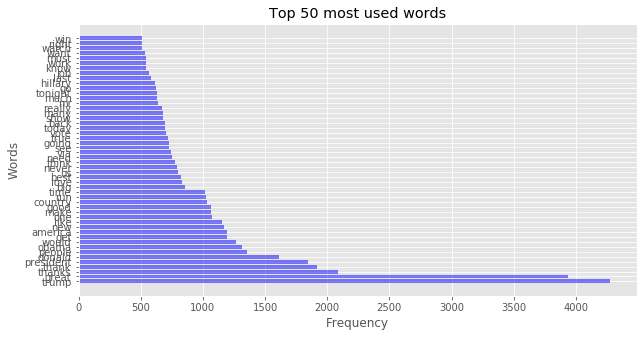

Wall time: 15.5 s


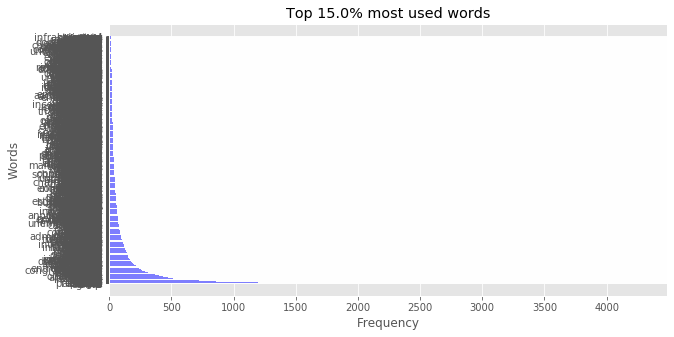

Wall time: 1min 5s


In [9]:
%time ExampleDF.plot_bar(type="wct", count=50)
%time ExampleDF.plot_bar(type="wpt")